In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset=pd.read_csv('wireless_churn.csv')
dataset.head()

AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  DayMins  \
0           128                1         1        2.7              1    265.1   
1           107                1         1        3.7              1    161.6   
2           137                1         0        0.0              0    243.4   
3            84                0         0        0.0              2    299.4   
4            75                0         0        0.0              3    166.7   

   DayCalls  MonthlyCharge  OverageFee  RoamMins  Churn  
0       110           89.0        9.87      10.0      0  
1       123           82.0        9.78      13.7      0  
2       114           52.0        6.06      12.2      0  
3        71           57.0        3.10       6.6      0  
4       113           41.0        7.42      10.1      0

In [3]:
#Show Key Statistics
dataset.describe()

AccountWeeks  ContractRenewal     DataPlan    DataUsage  CustServCalls  \
count   3333.000000      3333.000000  3333.000000  3333.000000    3333.000000   
mean     101.064806         0.903090     0.276628     0.816475       1.562856   
std       39.822106         0.295879     0.447398     1.272668       1.315491   
min        1.000000         0.000000     0.000000     0.000000       0.000000   
25%       74.000000         1.000000     0.000000     0.000000       1.000000   
50%      101.000000         1.000000     0.000000     0.000000       1.000000   
75%      127.000000         1.000000     1.000000     1.780000       2.000000   
max      243.000000         1.000000     1.000000     5.400000       9.000000   

           DayMins     DayCalls  MonthlyCharge   OverageFee     RoamMins  \
count  3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean    179.775098   100.435644      56.305161    10.051488    10.237294   
std      54.467389    20.069084      16.426032     2.535712     2.791840   
min       0.000000     0.000000      14.000000     0.000000     0.000000   
25%     143.700000    87.000000      45.000000     8.330000     8.500000   
50%     179.400000   101.000000      53.500000    10.070000    10.300000   
75%     216.400000   114.000000      66.200000    11.770000    12.100000   
max     350.800000   165.000000     111.300000    18.190000    20.000000   

             Churn  
count  3333.000000  
mean      0.144914  
std       0.352067  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [4]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ff7d561de7885561823d0488074ea5b659278e04b6aa19b5ee11ad8c15bd34a6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
#Create Profile Report

from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv('wireless_churn.csv')
profile = ProfileReport(df, title="wireless_churn")
profile.to_notebook_iframe()
profile.to_file("wireless_churn.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
from sklearn.ensemble import IsolationForest
# Select the relevant features
features = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
               'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
df['outlier'] = iso_forest.fit_predict(features)

# Filter out the outliers
df_cleaned = df[df['outlier'] != -1]

# Optionally, drop the outlier column
df_cleaned.drop('outlier', axis=1, inplace=True)

# Display the cleaned dataset
print(df_cleaned.head())

   AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  DayMins  \
0           128                1         1        2.7              1    265.1   
1           107                1         1        3.7              1    161.6   
2           137                1         0        0.0              0    243.4   
4            75                0         0        0.0              3    166.7   
5           118                0         0        0.0              0    223.4   

   DayCalls  MonthlyCharge  OverageFee  RoamMins  Churn  
0       110           89.0        9.87      10.0      0  
1       123           82.0        9.78      13.7      0  
2       114           52.0        6.06      12.2      0  
4       113           41.0        7.42      10.1      0  
5        98           57.0       11.03       6.3      0  


<ipython-input-6-2f04e8a09ca4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('outlier', axis=1, inplace=True)


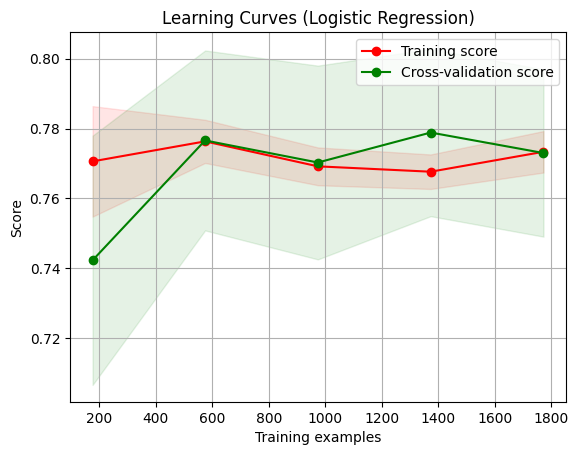

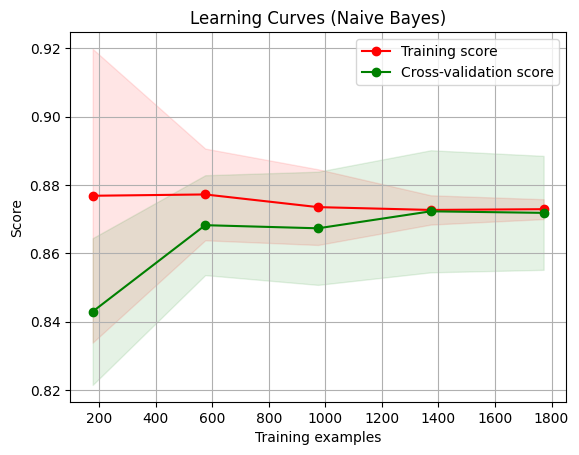

In [7]:

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = df_cleaned

# Feature selection
X = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
        'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
logistic_regression = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)
naive_bayes = GaussianNB()

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='recall_weighted')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Logistic Regression
plot_learning_curve(logistic_regression, "Learning Curves (Logistic Regression)", X_train, y_train, cv=5, n_jobs=-1)

# Plot learning curve for Naive Bayes
plot_learning_curve(naive_bayes, "Learning Curves (Naive Bayes)", X_train, y_train, cv=5, n_jobs=-1)

plt.show()


In [9]:


# Fit the Logistic Regression model
logistic_regression.fit(X_train, y_train)  # Add this line to train the model

# Predict with Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# ... (rest of the code)

In [10]:
# Predict with Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Fit the Naive Bayes model before predicting
naive_bayes.fit(X_train, y_train)  # Add this line to train the Naive Bayes model

# Predict with Naive Bayes
y_pred_nb = naive_bayes.predict(X_test)
y_pred_prob_nb = naive_bayes.predict_proba(X_test)[:, 1]

# ... (rest of the code remains the same)

In [11]:
# Predict with Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Predict with Naive Bayes
y_pred_nb = naive_bayes.predict(X_test)
y_pred_prob_nb = naive_bayes.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Logistic Regression Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Naive Bayes Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)

# Confusion Matrices
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Classification Reports
class_report_lr = classification_report(y_test, y_pred_lr)
class_report_nb = classification_report(y_test, y_pred_nb)

# Display results for Logistic Regression
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(f"ROC AUC: {roc_auc_lr:.2f}")

print("\nConfusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

print("\nClassification Report for Logistic Regression:")
print(class_report_lr)

# Display results for Naive Bayes
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")
print(f"ROC AUC: {roc_auc_nb:.2f}")

print("\nConfusion Matrix for Naive Bayes:")
print(conf_matrix_nb)

print("\nClassification Report for Naive Bayes:")
print(class_report_nb)


Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.30
Recall: 0.78
F1 Score: 0.44
ROC AUC: 0.81

Confusion Matrix for Logistic Regression:
[[615 215]
 [ 26  94]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       830
           1       0.30      0.78      0.44       120

    accuracy                           0.75       950
   macro avg       0.63      0.76      0.64       950
weighted avg       0.88      0.75      0.79       950

Naive Bayes Metrics:
Accuracy: 0.86
Precision: 0.46
Recall: 0.48
F1 Score: 0.47
ROC AUC: 0.81

Confusion Matrix for Naive Bayes:
[[763  67]
 [ 62  58]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       830
           1       0.46      0.48      0.47       120

    accuracy                           0.86       950
   macro avg       0.69      0.70      0.70    

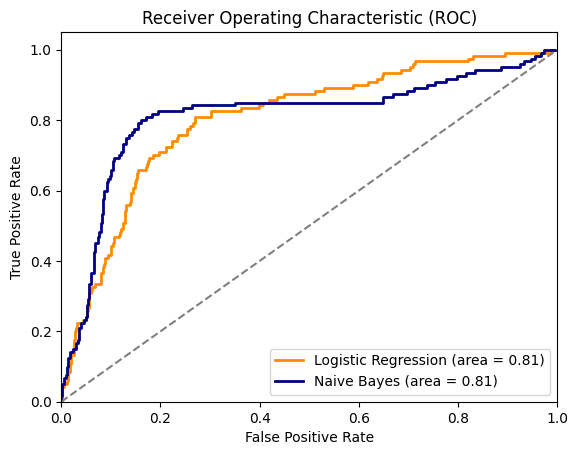

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = df_cleaned
# Feature selection
X = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
        'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train models
logistic_regression = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)
naive_bayes = GaussianNB()

# Fit the models
logistic_regression.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

# Predict probabilities
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]
y_pred_prob_nb = naive_bayes.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curves
plt.figure()

plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, color='navy', lw=2, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


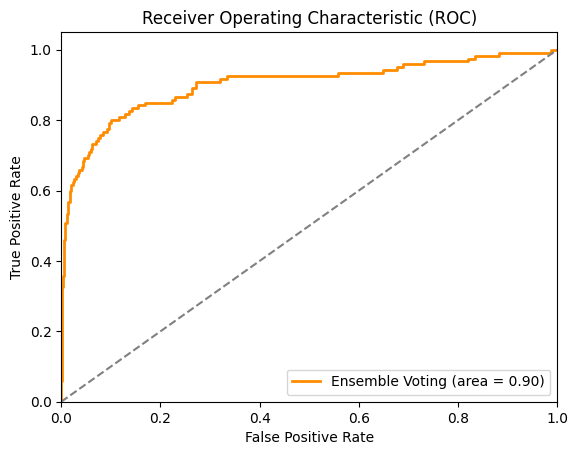

In [13]:

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Load the dataset
df = df_cleaned

# Feature selection
X = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls',
        'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
logistic_regression = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=100)

# Initialize and fit the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', logistic_regression),
    ('gb', gradient_boosting)
], voting='soft')

voting_clf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Ensemble Voting (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.91
Precision: 0.62
Recall: 0.73
F1 Score: 0.67
ROC AUC: 0.90

Confusion Matrix:
[[777  53]
 [ 32  88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       830
           1       0.62      0.73      0.67       120

    accuracy                           0.91       950
   macro avg       0.79      0.83      0.81       950
weighted avg       0.92      0.91      0.91       950



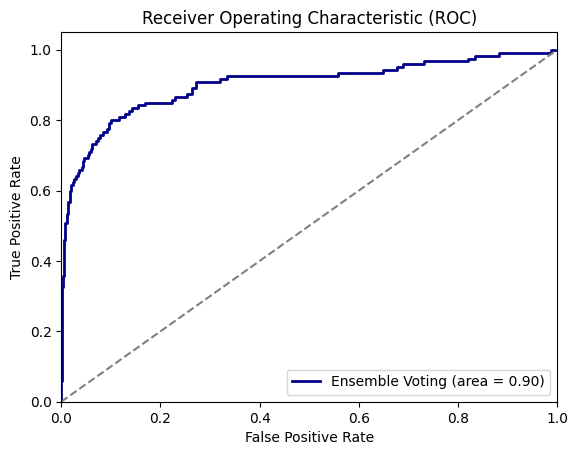

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on test data
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Optionally, plot ROC curve if not already done
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_prob)
roc_auc_voting = auc(fpr_voting, tpr_voting)

plt.figure()
plt.plot(fpr_voting, tpr_voting, color='darkblue', lw=2, label='Ensemble Voting (area = %0.2f)' % roc_auc_voting)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
